In [30]:
%load_ext autoreload
%autoreload 2

from collections import defaultdict

import dvu
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import mdcalc
import viz

plt.style.use('default')
dvu.set_style()

df = pd.read_pickle('../data/cdis_with_schemas_cleaned.pkl')

# get scores for each feature
df['feature_names_with_vals'] = df['input_schema'].apply(mdcalc.get_feature_names_with_vals_list)

# only keep scoring-only CDIs
feature_names_with_vals = df['feature_names_with_vals'][df['feature_names_with_vals'].apply(len) > 0]
print('only keeping', feature_names_with_vals.shape[0], 'CDIs out of', df.shape[0])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
only keeping 309 CDIs out of 690


In [31]:
# get score_dict
score_tuples = sorted(sum(feature_names_with_vals, []), key=lambda x: x[0])
ks = sorted(set([score_tuple[0] for score_tuple in score_tuples]))
score_dict = defaultdict(list)
for key, score in score_tuples:
    score_dict[key].append(score)

# reformat into a dataframe
score_dict_filt = [
    (k, v)
    for (k, v) in score_dict.items()
    if len(v) >= 5
]
scores_list = sorted(score_dict_filt, key=lambda x: len(x[1]), reverse=True)
feat_name_vec = sum([[k] * len(v) for (k, v) in scores_list], [])
score_vec = sum([v for (k, v) in scores_list], [])
df_box = pd.DataFrame.from_dict({'feat_name': feat_name_vec, 'score': score_vec})

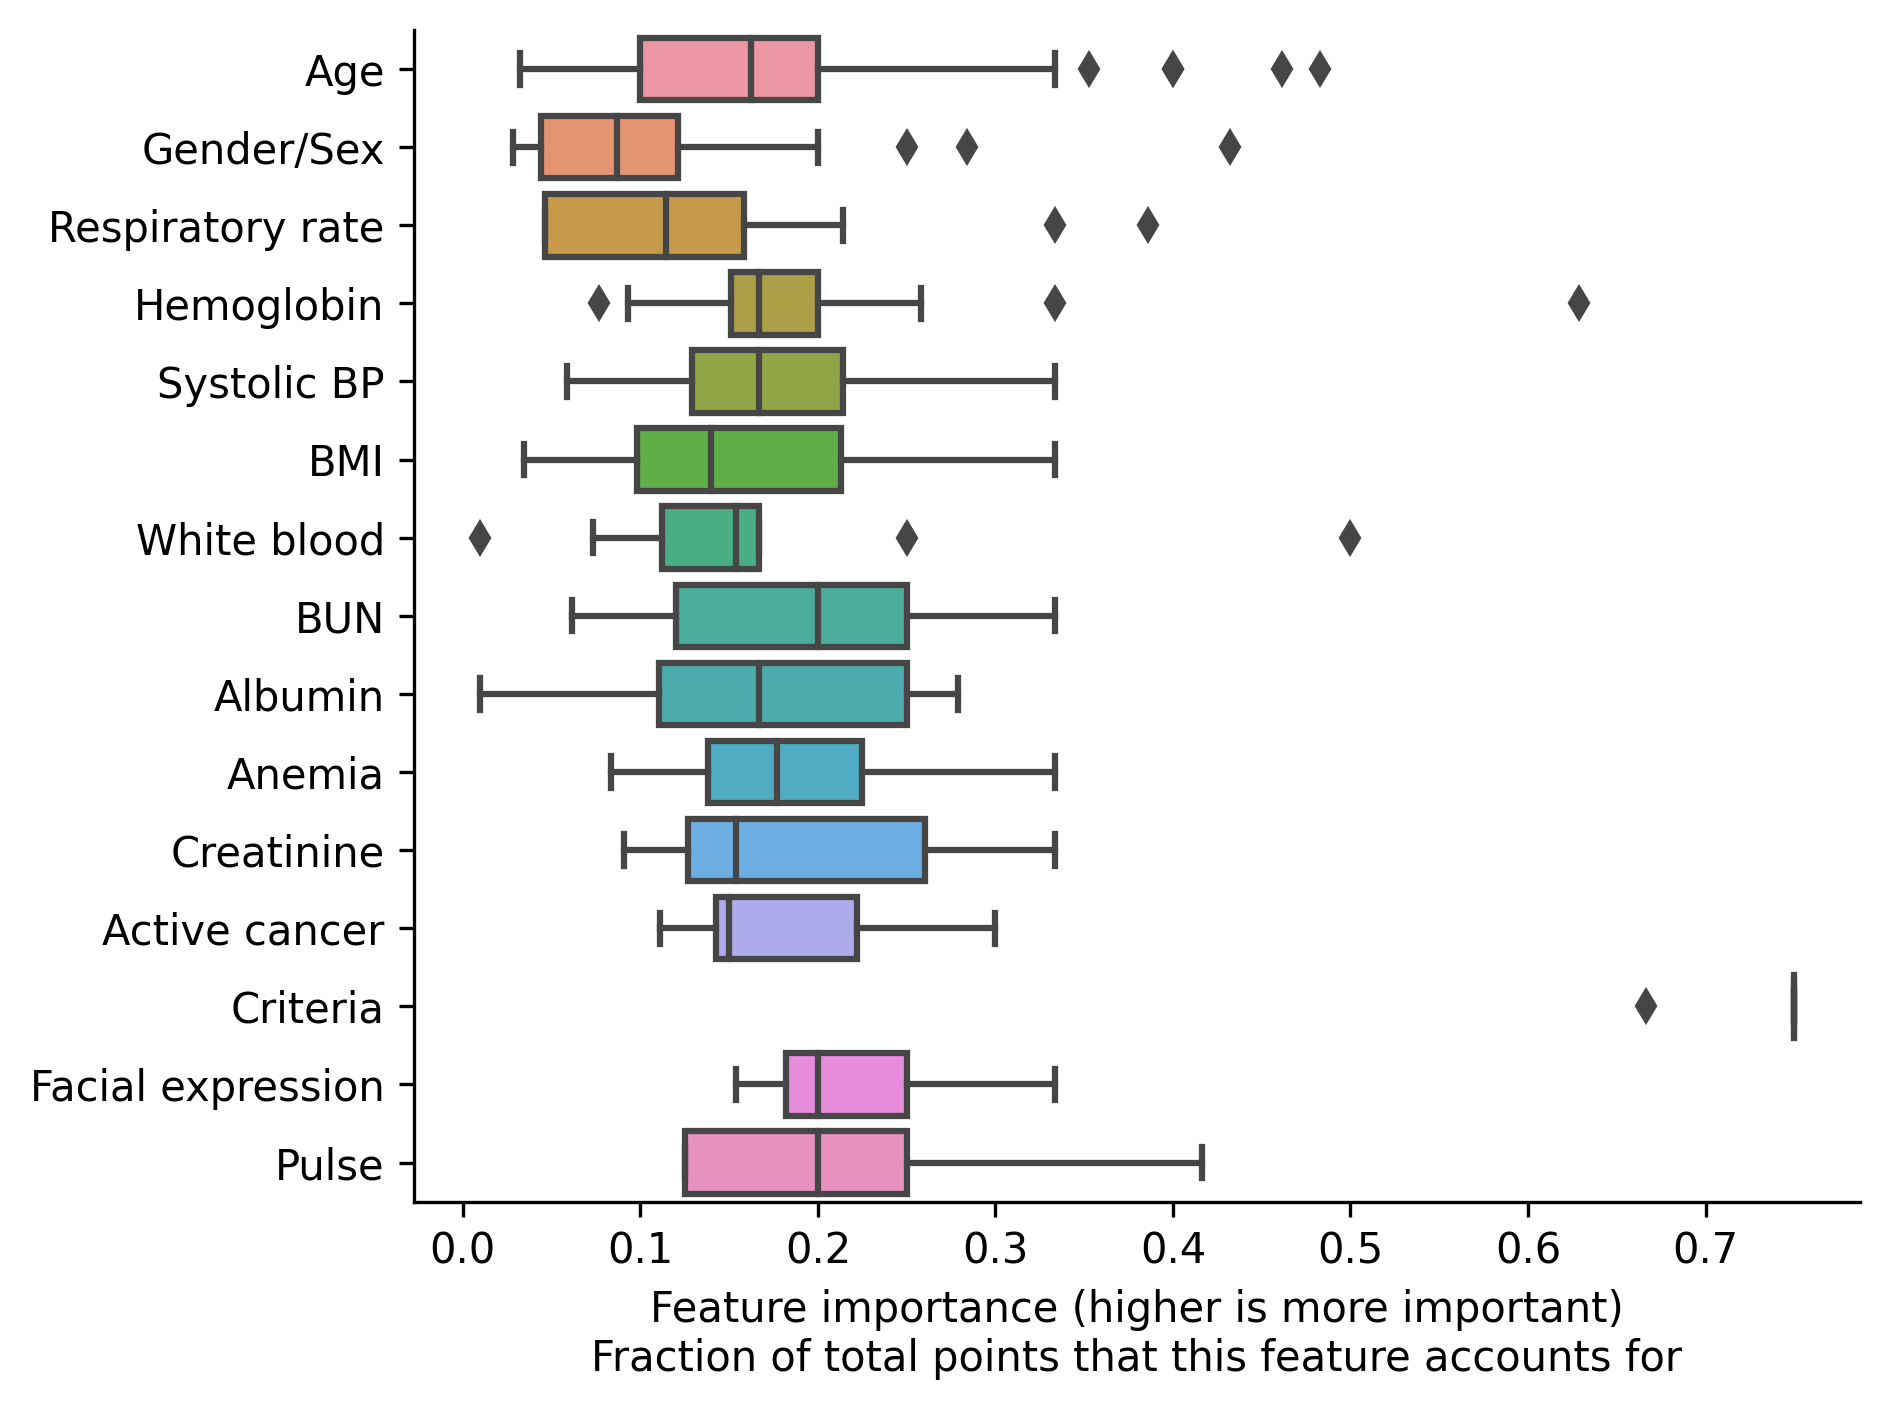

In [34]:
plt.figure(dpi=300)
sns.boxplot(x='score', y='feat_name', data=df_box)
plt.ylabel('')
plt.xlabel('Feature importance (higher is more important)\nFraction of total points that this feature accounts for')
viz.savefig('scoring_cdi_boxplot')

In [ ]:
# ax = sns.barplot(y=[k for (k, v) in scores_list],
#             x=[len(v) for (k, v) in scores_list],
#             )
# ax.bar_label(ax.containers[0])
# plt.xlabel(f'Number of scoring CDIs that use this feature\n(Out of {d.shape[0]} CDIs)')
# plt.tight_layout()
# viz.savefig('scoring_cdi_counts')

In [19]:
# example debugging schema
# x = d[d.url == 'cha2ds2-vasc-score-atrial-fibrillation-stroke-risk'].iloc[0]
# x = df.iloc[0]
# schema = x['input_schema']
# schema
# for s in schema:
#     options = s['options']
#     print(s['name'], clean.clean_feature_name(s['label_en']), [opt['value'] for opt in options])